<a href="https://colab.research.google.com/github/DiepTranCFPT/WEB/blob/main/MAS291DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import math


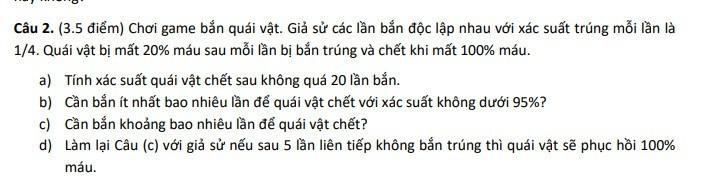

In [6]:
def BC(n):
  num = [0]*n
  m = 5
  t = 0
  h = 0
  for i in range(n):
      while m>0:
        t = t+1
        r = np.random.binomial(1,0.25)
        if r == 1:
          m = m-1
          h = 0
        else:
          h = h+1
        if h ==5:
          m = 5
          h = 0
      num[i] = t
  return num


In [7]:
BC(10)

[47, 47, 47, 47, 47, 47, 47, 47, 47, 47]

In [8]:
np.random.binomial(1,0.25)

0

In [9]:
def MC(n):
  h = [0]*n
  for i in range(n):
    samp = []
    hp = 5
    t = 0
    while hp>0:
      r = np.random.binomial(1,0.25)
      samp.append(r)
      if r==1:
        hp = hp - 1
        t = 0
      else:
        t = t + 1
      if t == 5:
        t =0
        hp = 5
    h[i] = len(samp)
  return h

In [10]:
np.mean(MC(1000000))

36.942437

In [11]:
samp = []
hp = 5
t = 0
while hp>0:
  r = np.random.binomial(1,0.25)
  samp.append(r)
  if r==1:
    hp = hp - 1
    t = 0
  else:
    t = t + 1
  if t == 5:
    t =0
    hp = 5
print(samp)

[0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]


In [12]:
#np.random.seed(123)
np.random.randint(1,5,1)

array([2])

In [13]:
samp

[0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1]

# Mục mới

In [14]:
# Load data: upload data vào colab

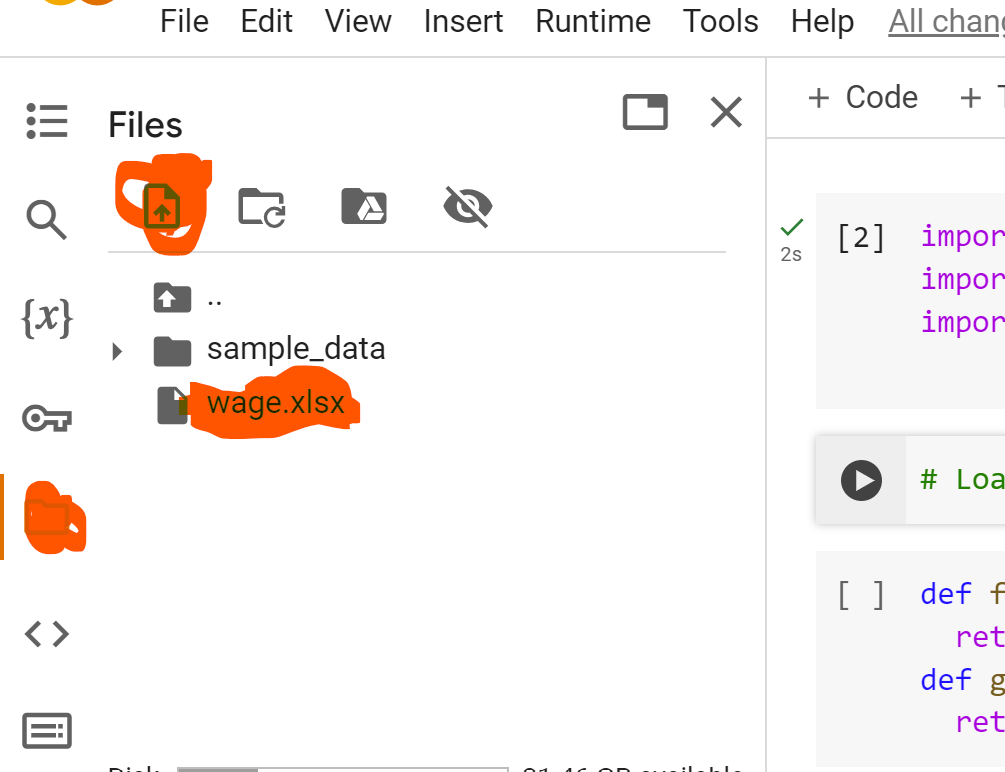

In [15]:
df = pd.read_excel("MAS.xlsx")

In [16]:
df = pd.read_excel("MAS.xlsx",sheet_name="DATA")

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# đếm các quan sát hợp lệ
df.count()

Count                      374
Person ID                  374
Occupation                 374
Age                        374
Sleep Duration             374
Quality of Sleep           374
Stress Level               374
Physical Activity Level    374
BMI Category               374
Blood Pressure             374
Heart Rate                 374
Daily Steps                374
Sleep Disorder             374
dtype: int64

In [19]:
# Xem tên các biến
df.columns
# hoặc: df.columns.values;
variables = list(df.columns.values) # List các biến

In [20]:
variables

['Count',
 'Person ID',
 'Occupation',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Stress Level',
 'Physical Activity Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

In [27]:
len(variables) # số lượng biến
df = df.dropna() # xoa null available
# Thống kê mô tả
df.describe()

,Count,Person ID,Age,Quality of Sleep,Stress Level,Physical Activity Level,Heart Rate,Daily Steps
count,374.0,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,1.0,187.500000,42.184492,7.312834,5.385027,59.171123,70.165775,6816.844920
std,0.0,108.108742,8.673133,1.196956,1.774526,20.830804,4.135676,1617.915679
min,1.0,1.000000,27.000000,4.000000,3.000000,30.000000,65.000000,3000.000000
25%,1.0,94.250000,35.250000,6.000000,4.000000,45.000000,68.000000,5600.000000
50%,1.0,187.500000,43.000000,7.000000,5.000000,60.000000,70.000000,7000.000000
75%,1.0,280.750000,50.000000,8.000000,7.000000,75.000000,72.000000,8000.000000
max,1.0,374.000000,59.000000,9.000000,8.000000,90.000000,86.000000,10000.000000


In [29]:
# lấy cột biến
y = df["Quality of Sleep"]
x_df = df["Age"] # lấy 1 cột biến educ
x = df[["Age","Quality of Sleep",
 "Sleep Duration",
 "Stress Level"]] # lấy nhiều biến

<Axes: >

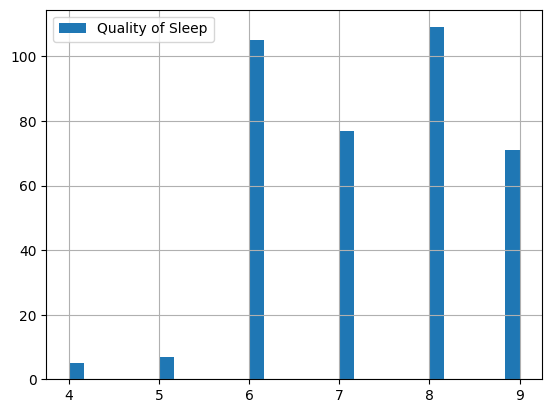

In [30]:
y.hist(bins=30,legend= True,xlabelsize=10)

<Axes: >

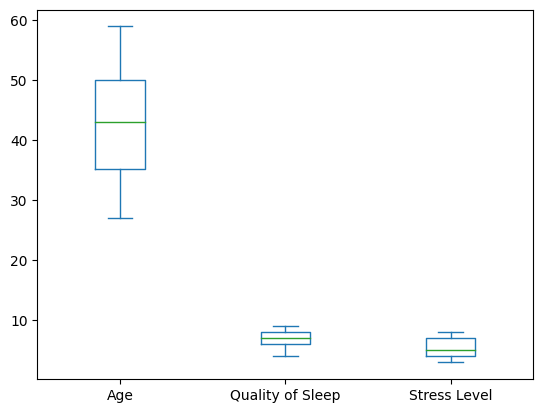

In [31]:
df[["Age","Quality of Sleep","Stress Level"]].plot.box(legend= True)

In [32]:
# lấy cột biến
y = df["Quality of Sleep"]
x_df = df["Age"] # lấy 1 cột biến educ
x = df[["Age","Quality of Sleep"]] # lấy nhiều biến

# Mục mới

<Axes: xlabel='Quality of Sleep', ylabel='Age'>

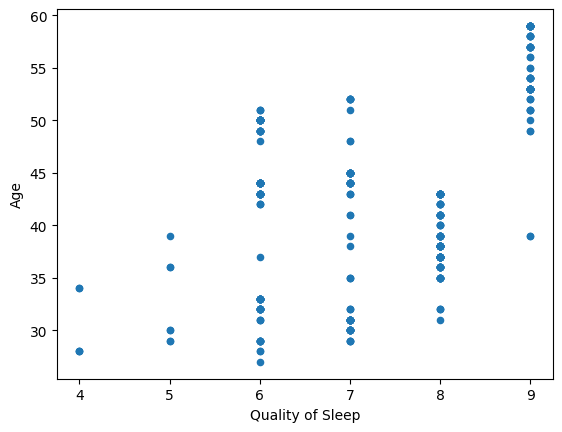

In [33]:
df[["Age","Quality of Sleep","Stress Level"]].plot.scatter(x="Quality of Sleep",y="Age")

In [34]:
# hồi quy với hệ số chặn
x = sm.add_constant(x) # add hệ số chặn
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.520e+30
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        06:13:15   Log-Likelihood:                 11579.
No. Observations:                 374   AIC:                        -2.315e+04
Df Residuals:                     371   BIC:                        -2.314e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -4.43e-14   2.97e-15  

In [35]:
# hồi quy với hệ số chặn
x_df = sm.add_constant(x_df) # add hệ số chặn
model = sm.OLS(y, x_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     107.6
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           2.55e-22
Time:                        06:13:38   Log-Likelihood:                -549.89
No. Observations:                 374   AIC:                             1104.
Df Residuals:                     372   BIC:                             1112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5549      0.271     16.785      0.0

In [36]:
math.comb(30,3)

4060

In [37]:
np.random.seed(1)

In [38]:
np.random.uniform(1,10)

4.753198042323167

In [39]:
def check(x):
  if x>7:
    return 1
  else:
    return 0

In [40]:
t=0
for i in range(10**6):
  t=t+check(np.random.uniform(1,10))
t/10**6

0.333398

In [41]:
out = [0]*10**6
for i in range(10**6):
  out[i] = check(np.random.uniform(1,10))

In [42]:
np.sum(out)/10**6

0.333019

In [43]:
x = np.random.uniform(0,1)
y = np.random.uniform(0,1)
def checkxy(x,y):
  if (x-0.5)**2+(y-0.5)**2<=0.25:
    return 1
  else:
    return 0
checkxy(x,y)

0

In [44]:
t=0
n=10**6
for i in range(n):
  t=t+checkxy(np.random.uniform(0,1),np.random.uniform(0,1))
t/n*4

3.141104

In [45]:
X = {"a":0.1,"b":0.2,"c":0.3,"d":0.4}
np.random.choice(list(X.keys()),1,p=list(X.values()))[0]

'b'

In [46]:
out = ["a","b","c","d"]
P = [0.1,0.2,0.3,0.4]
x = [10,20,20,100]
X = dict(zip(out,x))


In [47]:
np.random.choice(out,1,replace=True,p=P)

array(['b'], dtype='<U1')

In [48]:
X["b"]

20

In [49]:
X[np.random.choice(out,1,replace=True,p=P)[0]]

20

In [50]:
t = [0]*10**4
for i in range(10**4):
  t[i] = X[np.random.choice(out,1,replace=True,p=P)[0]]


In [51]:
np.mean(t)

50.992

In [52]:
x = np.array(x)
P = np.array(P)

In [54]:
var = np.sum(x**2*P)-np.sum(x*P)**2
sigma = np.sqrt(var)

In [55]:

print(var,sigma)

1609.0 40.11234224026316


In [56]:
np.random.seed(123)
x = np.random.randint(1,11,10000)
y = np.random.binomial(10,0.25,1000)

In [57]:
pd.DataFrame(y).value_counts()

2    283
3    222
1    189
4    157
5     68
0     51
6     23
7      6
9      1
dtype: int64